In [1]:
#Akash Lal Dutta
#226101001
import numpy as np
import matplotlib.pyplot as plt
import math

#function to generate N random number in an interval[-100,100]
def gen_rand():
  N=int(input("Enter the value of N to generate N random number: "))
  a= -100
  b= 100
  points= np.random.randint(a,b, N)
  return points

#function to plot the frequency ditribution of given points
def plot_fd(points):
    print("Plotting the frequency distribution of generated points...")
    #fig, ax = plt.subplots() 
    plt.hist(points, bins=200)
    plt.show()

# function to evaluate normalized frequency ditribution of given data
def eval_nfd(points):
    m=int(input("To evaluate NFD, enter number of bins(m): "))
    n=len(points)
    max_p=max(points)
    min_p=min(points)
    bin_p= (max_p-min_p)/(m-1)
    h=np.zeros(m+1)
    for i in range(n):
      b=math.floor((points[i] - min_p)/bin_p)+1
      h[b]=(h[b]+ 1/n)
    nfd = list(enumerate(h))
    nfd=nfd[1:]
    print("NFD is evaluted successfully.")
    return nfd

#function to plot the frequency ditribution of given points
def plot_nfd(nfd):
    #nfd= normalize_fd(points)
    print("Plotting the normalized frequency distribution...")
    ind = []
    fre = []
    for item in nfd:
       ind.append(item[0])
       fre.append(item[1])
    plt.bar(ind, fre)
    plt.show()

Enter the value of N to generate N random number: 100
Plotting the frequency distribution of generated points...


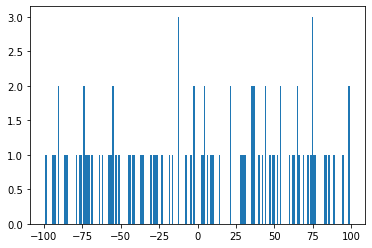

To evaluate NFD, enter number of bins(m): 200
NFD is evaluted successfully.
Plotting the normalized frequency distribution...


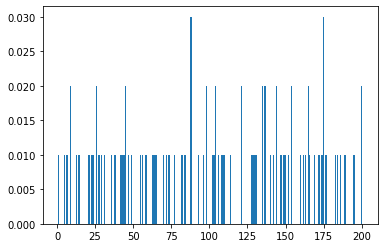

In [ ]:
# N=100, b=100
points=gen_rand()
plot_fd(points)
nfd=eval_nfd(points)
plot_nfd(nfd)

Enter the value of N to generate N random number: 1000
Plotting the frequency distribution of generated points...


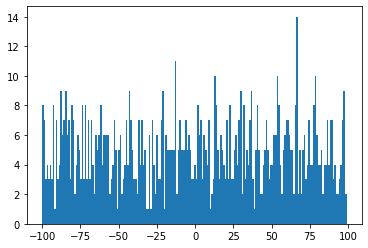

To evaluate NFD, enter number of bins(m): 200
NFD is evaluted successfully.
Plotting the normalized frequency distribution...


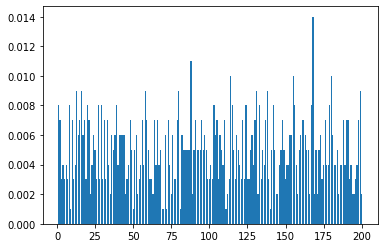

In [ ]:
# N=1000, b=100
points=gen_rand()
plot_fd(points)
nfd=eval_nfd(points)
plot_nfd(nfd)

Enter the value of N to generate N random number: 10000
Plotting the frequency distribution of generated points...


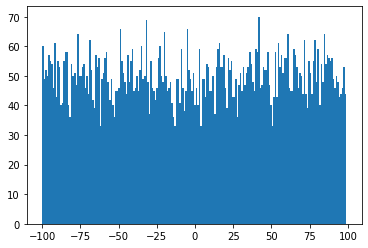

To evaluate NFD, enter number of bins(m): 200
NFD is evaluted successfully.
Plotting the normalized frequency distribution...


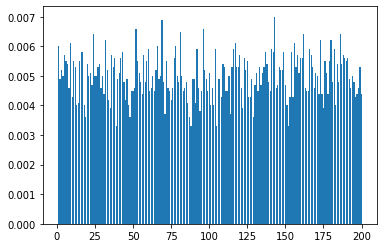

In [ ]:
# N=10000, b=200
points=gen_rand()
plot_fd(points)
nfd=eval_nfd(points)
plot_nfd(nfd)

**2. With N= 5000 and m= 400, construct a normalized frequency distribution. Evaluate the weighted AM, GM, HM, median and mode.**

In [ ]:
# Generating N=5000 points and construting normalized frequency distribution taking m=400 (Q1)
points=gen_rand()
nfd=eval_nfd(points)

Enter the value of N to generate N random number: 5000
To evaluate NFD, enter number of bins(m): 400
NFD is evaluted successfully.


In [ ]:
# function to evaluate weighted AM
def eval_WAM(wfd):
    num=0
    den=0
    for i in wfd:
        num=num+i[0]*i[1]
        den=den+i[1]
    wam=num/den
    print("Evaluated weighted AM of given distribution is: ", wam)

# function to evaluate weighted GM
def eval_WGM(wfd):
    x = []
    h = []
    for item in wfd:
       x.append(item[0])
       h.append(item[1])
    n=sum(h)
    multiply=1
    for i in range(len(x)):
        if h[i]>0:
            x_t=x[i]*h[i]
        multiply = (multiply)*(x_t)
        
    wgm = (multiply)**(1/n)
    print("Evaluated weigted GM of given distribution is: ", wgm)

# function to evaluate weighted HM
def eval_WHM(wfd):
    x = []
    h = []
    for item in wfd:
       x.append(item[0])
       h.append(item[1])   
    n=sum(h)
    sm = 0
    for i in range(len(x)) :
        if h[i]>0:
            sm = sm + (h[i]) / x[i];
    whm= n / sm
    print("Evaluated weigted HM of given distribution is: ", whm)

# function to evaluate weighted median    
def eval_wt_median(wfd):
    x = []
    h = []
    for item in wfd:
       x.append(item[0])
       h.append(item[1])
    lhs=0
    for i in range(len(x)):
        lhs=lhs+ h[i]
        if lhs>=0.5:
            print("Evaluated median of given distribution is: ", x[i])
            return

# function to evaluate weighted mode
def eval_wt_mode(wfd):
    x = []
    h = []
    for item in wfd:
       x.append(item[0])
       h.append(item[1])
    wmo=x[h.index(max(h))]
    print("Evaluated mode of given distribution is: ", wmo)
    

In [ ]:
#evaluating  the weighted AM, GM, HM, median and mode for construted NFD
eval_WAM(nfd)
eval_WGM(nfd)
eval_WHM(nfd)
eval_wt_median(nfd)
eval_wt_mode(nfd)

Evaluated weighted AM of given distribution is:  199.0149999999999
Evaluated weigted GM of given distribution is:  3.62966042310144e-57
Evaluated weigted HM of given distribution is:  58.73139967656184
Evaluated median of given distribution is:  199
Evaluated mode of given distribution is:  327


**3. Write a general code that takes any weighted dataset.**

In [ ]:
# Function to sort element (x) of weighted dataset and corrosponding weight in assending order .
# Used while finding the median of weighted frequency distribution.
def sort(wfd):
    n=len(wfd)
    sorted_x=[]
    sorted_wt=[]
    unsortedList = wfd
    for i in range(n-1):
      # print(list[i])
        for j in range(n-i-1):
            if unsortedList[j][0] > unsortedList[j + 1][0]:
                unsortedList[j], unsortedList[j + 1] = unsortedList[j + 1], unsortedList[j]
  
    for i in unsortedList:
        sorted_x.append(i[0])
        sorted_wt.append(i[1])

    return sorted_x, sorted_wt


def eval_wt_stat(wfd):
    x = []
    w = []
    for item in wfd:
        x.append(item[0])
        w.append(item[1])
    
    n=sum(w)

    #weighted mean
    sum_xw=0
    for i in range(len(x)):
        if w[i]>0:
            x_w=x[i]*w[i]
            sum_xw=sum_xw+x_w
    wam=sum_xw/n
    
    #weighted GM
    mul_xw=1
    for i in range(len(x)):
        if w[i]>0:
            x_w=x[i]*w[i]
        mul_xw = (mul_xw)*(x_w)
    wgm = (mul_xw)**(1/n)
    
    #weighted HM
    sm = 0
    for i in range(len(x)) :
        if w[i]>0:
            sm = sm + (w[i]) / x[i];
    whm= n / sm  
    
    #weighted mode
    wmo=x[w.index(max(w))]
    
    #weighted median
    st_x,st_w=sort(wfd)
    lhs=0
    for i in range(len(st_x)):
        lhs=lhs+ st_w[i]
        if lhs>=n/2:
            median= st_x[i]
            break
        
    print("Evaluated...","\n AM = ", wam,"\n GM = ", wgm,"\n HM = ",whm,"\n median = ",median, "\n mode = ", wmo )
    

In [ ]:
# weighted dataset
wfd=[(1,5),(2,10),(3,0),(12,2),(9,4),(10,1),(11,5),(8,5),(7,0)]

In [ ]:
eval_wt_stat(wfd)

Evaluated... 
 AM =  5.9375 
 GM =  2.4026379101013027 
 HM =  2.7140134072947677 
 median =  8 
 mode =  2


**4. Generation of Points**

**a. Randomly generate n=1000 2D points 𝑆𝑒 inside an a 2D ellipse of axes 𝑟𝑥 = 150, 𝑟𝑦 = 100 and centered at 𝑥𝑐=(−10,20). The axes of the ellipse are aligned with the co-ordinate system axes.**

Set of points is generated successfully of size:  (1000, 2)


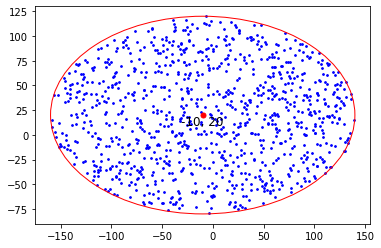

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Set the center and axis lengths of the ellipse
m_x=-10
m_y=20
a = 150
b = 100

# Generate 1000 points within the ellipse
n = 1000
theta = np.random.rand(n) * 2 * np.pi
r =  np.sqrt(np.random.rand(n))

x = m_x + r * a* np.cos(theta)
y = m_y + r * b* np.sin(theta)

#geterated points
points = np.column_stack((x, y))
print("Set of points is generated successfully of size: ", points.shape)

ax = plt.subplot(111)
# Plotting the points
ax.scatter(points[:, 0], points[:, 1], c='b', s=3)

# Plotting the ellipse 
ellipse = Ellipse((m_x,m_y), width=2*a, height=2*b,facecolor='none',edgecolor='red')
ax.add_patch(ellipse)
# Plotting the center of ellipse
plt.plot(m_x,m_y,marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.text(m_x, m_y, '%d, %d' % (int(m_x), int(m_y)),fontsize=12,horizontalalignment='center',verticalalignment='top')
# Show the plot
plt.show()

**b. Randomly generate n=1000 points 𝑆ℎ𝑠 inside a 10-Dimensional hypersphere of radius 𝑟=100, centered at 𝑥𝑐=(−1,2−1,0,0,0,3,4,9,0).**

In [ ]:
import numpy as np
import math

n=1000
c=np.array([-1,2,-1,0,0,0,3,4,9,0])
r=100
 
# calculate euclidean distance
def euclidean_distance(a, b):
    return math.sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))

#function for generating 10d point
def ran_point():
    point=[]
    for i in range(10):
        x_i=np.random.randint((c[i]-r),(c[i]+r))
        point.append(x_i)
    return np.array(point)

#Generating 1000 10d-points inside given hypersphere
points_S_hs=[]
dis=[]
for i in range(n):
    point=ran_point()
    # calculating distance
    dist1 = euclidean_distance(c, point)
    d=np.random.randint(0,r)/dist1
    point=point*d
    points_S_hs.append(point)
    dist_pc = euclidean_distance(c, point)
    dis.append(dist_pc)
    #print(dist1,dist2)
print("Set of points is generated successfully of size: ", len(points_S_hs))
# Euclidean distance between gererated points and center of hypersphere is <= 100 ie radius of given hpersphare.
# Uncomment the next line to print the euclidean distance between gererated points and center of the hypersphere.

# print("Euclidean distance between gererated points and center of hypersphere are : \n", dis)

Set of points is generated successfully of size:  1000


In [ ]:
points_S_hs

[array([  7.85130329,  -5.94795703, -19.50929907,   5.71003875,
          8.80297641, -13.08550548,  -9.04089469,  17.60595282,
          5.23420219,  21.41264532]),
 array([  4.59722806,  14.44843106, -25.94150122,  20.03077942,
          6.8958421 , -23.97126062, -28.24011525, -28.89686212,
         -7.55258896,  -8.53770926]),
 array([-14.14761016,  -4.56374521,   6.84561782,  -3.65099617,
          2.58612229, -14.75610952,   3.19462165,  -5.62861909,
         12.32211207,  -1.82549808]),
 array([ 0.35823039, -0.65675572,  4.29876468,  1.3732165 , -2.08967728,
         3.52259884,  5.37345585,  0.83587091, -4.11964949, -5.79139131]),
 array([-4.19965528, -2.12342121, -3.3502868 , -2.3593569 , -2.83122828,
        -2.64247973,  4.7187138 ,  2.3593569 , -4.10528101,  0.42468424]),
 array([  4.66168061, -19.11289052,  36.36110879,  -8.39102511,
         21.44373083,  42.88746165,  42.88746165,  40.55662134,
          0.46616806,  13.51887378]),
 array([-11.49592276,  11.97491954,   0.

**c. Randomly generate n= 1000 2D points 𝑆𝑒𝑜 inside an oriented 2D ellipse of axes 𝑟𝑥=150, 𝑟𝑦=100and centered at 𝑥𝑐=(−10,20). The major axis makes an angle of 𝜃=𝜋/3 with the horizontal axis 𝑋**

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Set the center and axis lengths of the ellipse
x_c=np.array([-10,20])
r_x = 150
r_y = 100

# Generate 1000 points within the ellipse
# n = 1000
def gen_points():
    n=int(input("Enter n to generate n points: "))
    theta = np.random.rand(n) * 2 * np.pi
    r =  np.sqrt(np.random.rand(n))
    #generating random point
    x =  r * (r_x/2)* np.cos(theta)
    y =  r * (r_y/2)* np.sin(theta)
    points = np.column_stack((x, y))
    # Rotation matrix
    m=np.array([[0.5, math.sqrt(3)/2], [ -math.sqrt(3)/2,0.5]])
    # Rotation using rotation matrix m
    points=np.dot(points,m)
    # Translation (Gives the final 1000 points)
    S_eo = x_c+points

    print(len(S_eo),' points have been generated.\n')
    return S_eo

def plot_point(S_eo):
    print("Plotting the Points...")
    plt.scatter(S_eo[:, 0], S_eo[:, 1], c='b', s=2)

    # Plot the ellipse using the plot function
    m=np.array([[0.5, math.sqrt(3)/2], [ -math.sqrt(3)/2,0.5]])
    theta_grid = np.linspace(0, 2*np.pi, 100)
    x_ellipse = (r_x/2)*np.cos(theta_grid)
    y_ellipse = (r_y/2)*np.sin(theta_grid)
    p_ellipse = x_c+ np.dot(np.column_stack((x_ellipse, y_ellipse)),m)
    x_ellipse = []
    y_ellipse = []
    for i in p_ellipse:
      x_ellipse.append(i[0])
      y_ellipse.append(i[1])
    x= np.linspace(-10,50,1000)
    y=20+0*x
    plt.arrow(x_c[0],x_c[1], 65, 0, length_includes_head=True, head_width=5, head_length=5, fc='r', ec='r')

    #plt.plot(x,y,'-r')    
    plt.plot(x_c[0],x_c[1],marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red" )
    plt.plot(x_ellipse,y_ellipse,'r', linewidth=1)

    # Show the plot
    plt.show()

Enter n to generate n points: 1000
1000  points have been generated.

Plotting the Points...


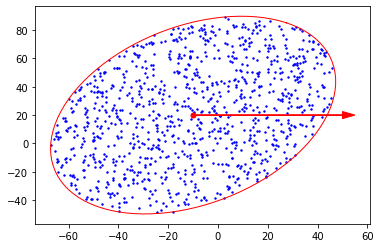

In [12]:
S_eo=gen_points()
plot_point(S_eo)

Enter n to generate n points: 3000
3000  points have been generated.

Plotting the Points...


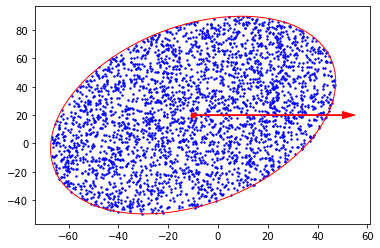

In [13]:
S_eo=gen_points()
plot_point(S_eo)

**5. Covariance Matrix Computation**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import linalg as LA

def plot_ev(S_eo):
    k=int(input("Enter value of k : "))
    c=np.cov(S_eo.T)
    eigen_values, eigen_vectors = LA.eig(c)
    print(eigen_values)
    fig, ax = plt.subplots()

    eig_vec1 = eigen_vectors[:,0]
    eig_vec2 = eigen_vectors[:,1]
    print(eig_vec1,eig_vec2)
# Plot the ellipse using the plot function
    m=np.array([[0.5, math.sqrt(3)/2], [ -math.sqrt(3)/2,0.5]])
    theta_grid = np.linspace(0, 2*np.pi, 100)
    x_ellipse = (r_x/2)*np.cos(theta_grid)
    y_ellipse = (r_y/2)*np.sin(theta_grid)
    p_ellipse = x_c+ np.dot(np.column_stack((x_ellipse, y_ellipse)),m)
    x_ellipse = []
    y_ellipse = []
    for i in p_ellipse:
      x_ellipse.append(i[0])
      y_ellipse.append(i[1])
        
    ax.arrow(x_c[0],x_c[1], 65, 0,width=0.001, length_includes_head=True, head_width=5, head_length=5, fc='r', ec='r')

    ax.plot(x_c[0],x_c[1],marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red" )
    ax.plot(x_ellipse,y_ellipse,'r', linewidth=1)

    l_1=k*(math.sqrt(eigen_values[0]))
    l_2=k*(math.sqrt(eigen_values[1]))
    
    #print(l_1)
    #print(l_2)

    vec1=eig_vec1*l_1
    vec2=eig_vec2*l_2
    #print(vec1)
    #print(vec2)
    ax.quiver(x_c[0],x_c[1], vec1[0], vec1[1], color='b', units='xy', scale=1)
    ax.quiver(x_c[0],x_c[1], vec2[0], vec2[1], color='g', units='xy', scale=1)

    plt.show()
    

In [15]:
S_eo=gen_points()
print("Covariance matrix of S_eo:\n", np.cov(S_eo.T))

Enter n to generate n points: 1000
1000  points have been generated.

Covariance matrix of S_eo:
 [[ 813.55198428  307.53904331]
 [ 307.53904331 1208.47570993]]


Enter value of k : 2
[ 645.53956562 1376.48812859]
[-0.87757887  0.47943229] [-0.47943229 -0.87757887]


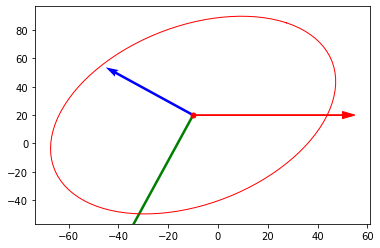

In [16]:
plot_ev(S_eo)

Enter value of k : 4
[ 630.43338377 1411.25276616]
[-0.85542738  0.51792278] [-0.51792278 -0.85542738]


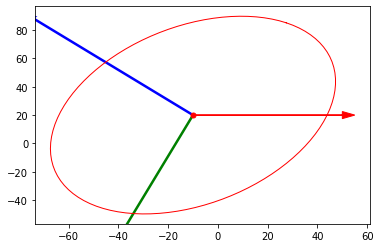

In [ ]:
plot_ev(S_eo)

Enter n to generate n points: 3000
3000  points have been generated.

Covariance matrix of S_eo:
 [[ 799.54499542  325.12812234]
 [ 325.12812234 1214.9033981 ]]
Enter value of k : 1


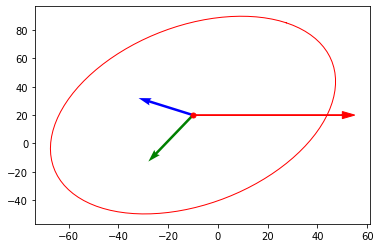

Enter value of k : 2


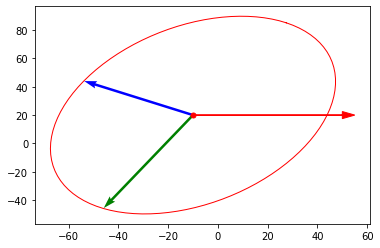

In [ ]:
S_eo=gen_points()
print("Covariance matrix of S_eo:\n", np.cov(S_eo.T))
plot_ev(S_eo)
plot_ev(S_eo)

Enter n to generate n points: 10000
10000  points have been generated.

Covariance matrix of S_eo:
 [[ 820.47359821  345.51894204]
 [ 345.51894204 1225.79175776]]
Enter value of k : 1


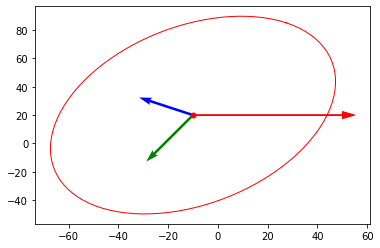

Enter value of k : 2


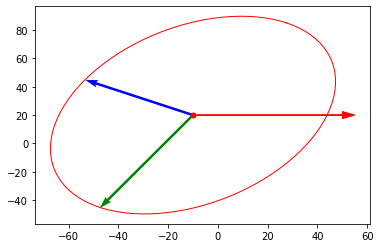

In [ ]:
S_eo=gen_points()
print("Covariance matrix of S_eo:\n", np.cov(S_eo.T))
plot_ev(S_eo)
plot_ev(S_eo)

In [ ]:
math.sqrt(21.17175348*21.17175348+12.72157984*12.72157984)

24.699832773591535

[0.89578578 0.44448604]
[-0.44448604  0.89578578]


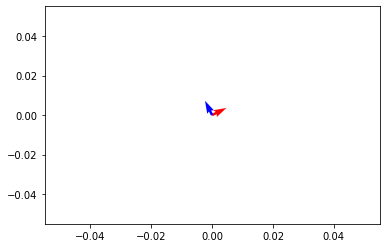

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import linalg as LA

# Assume that I loaded 'N' no of 2d points from a file and used
# np.cov() to find the below covariance matrix

# This is my covariance matrix obtained from 2 x N points
cov_mat = [[3407.3108669,  1473.06388943],
           [1473.06388943, 1169.53151003]]

eigen_values, eigen_vectors = LA.eig(cov_mat)

origin = [0, 0]

eig_vec1 = eigen_vectors[:,0]
eig_vec2 = eigen_vectors[:,1]

print(eig_vec1)
print(eig_vec2)


# This line below plots the 2d points
#plt.scatter(np_array[:,0], np_array[:,1])

plt.quiver(*origin, *eig_vec1, color=['r'], scale=21)
plt.quiver(*origin, *eig_vec2, color=['b'], scale=21)
plt.show()

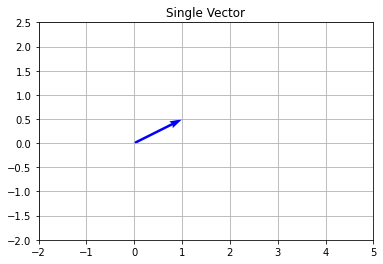

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
  
# Vector origin location
X = [0]
Y = [0]
  
# Directional vectors
U = [1]  
V = [0.5]  
  
# Creating plot
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1)
plt.title('Single Vector')
  
# x-lim and y-lim
plt.xlim(-2, 5)
plt.ylim(-2, 2.5)
  
# Show plot with grid
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

matrix=S_eo.T # S_eo computed in Q.4.c
#print(matrix.shape)
#computing the mean
mean_arr=np.array([])
for i in range(len(matrix)):
  mean = np.sum(matrix[i])/len(matrix[i])
  mean_arr=np.append(mean_arr,mean)

#computing the covariance matrix
c=np.zeros([len(mean_arr),len(mean_arr)])
for i in range(len(matrix)):
  m=np.matrix((matrix[:,i]-mean_arr))
  c=np.add(c,np.dot(m.T,m))
c=c/len(matrix)
print('Computed covariance matrix for given data is: \n', c)

Computed covariance matrix for given data is: 
 [[ 502.49686242  258.91586648]
 [ 258.91586648 1288.85069253]]
